In [3]:
import pandas as pd
import numpy as np
import csv
import math

In [4]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import datasets
import matplotlib.pyplot as plt

# Regression

#### We start by reading the data

In [5]:
df = pd.read_csv('../Datasets/diabetes_data.csv')
df

,Unnamed: 0,ALQ120Q,BMXBMI,BMXHT,BMXLEG,BMXWAIST,BMXWT,BPQ020,DMDEDUC2,INDHHINC,LBXTC,MCQ250A,PAQ180,RIAGENDR,RIDAGEYR,RIDRETH1,SMD030,status
0,2,2.0,27.9,169.0,42.3,96.0,79.7,2.0,4.0,2.0,650.0,2.0,1.0,2.0,37.0,3.0,15.0,0
1,3,1.0,63.4,164.4,36.0,144.6,171.4,2.0,4.0,11.0,169.0,1.0,2.0,2.0,32.0,4.0,20.0,0
2,6,10.0,32.2,178.5,46.4,110.2,102.6,2.0,3.0,2.0,142.0,2.0,4.0,1.0,29.0,1.0,14.0,0
3,9,2.0,26.9,176.2,38.1,93.6,83.6,2.0,5.0,9.0,178.0,1.0,3.0,1.0,60.0,3.0,18.0,1
4,11,1.0,23.5,171.2,41.0,83.4,68.9,2.0,2.0,2.0,159.0,1.0,1.0,2.0,21.0,3.0,9.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1851,4398,7.0,27.6,171.3,37.5,93.4,80.9,2.0,5.0,10.0,232.0,1.0,2.0,2.0,44.0,3.0,15.0,0
1852,4399,1.0,28.5,163.2,39.5,89.4,76.0,2.0,3.0,9.0,158.0,1.0,2.0,2.0,21.0,3.0,17.0,0
1853,4406,0.0,28.0,157.1,40.4,87.9,69.2,2.0,3.0,8.0,231.0,1.0,2.0,2.0,28.0,3.0,22.0,0
1854,4407,2.0,22.9,168.6,37.4,90.8,65.0,2.0,2.0,3.0,216.0,1.0,2.0,1.0,71.0,3.0,16.0,0


In [6]:
# TODO: the column status represents the classes of the records, check how many classes do we have
df.status.unique()

array([0, 1])

In [7]:
# TODO: check the correlation between the attributes to see if there are two attributes that are highly correlated
cor_matrix = df.corr()
cor_matrix

,Unnamed: 0,ALQ120Q,BMXBMI,BMXHT,BMXLEG,BMXWAIST,BMXWT,BPQ020,DMDEDUC2,INDHHINC,LBXTC,MCQ250A,PAQ180,RIAGENDR,RIDAGEYR,RIDRETH1,SMD030,status
Unnamed: 0,1.000000,-0.023657,0.021137,-0.039608,-0.027007,0.007509,0.000890,0.013895,-0.015294,0.000506,0.002670,0.017763,0.001639,0.047201,-0.020141,-0.016365,-0.038691,-0.056115
ALQ120Q,-0.023657,1.000000,0.010670,0.039267,0.011265,0.038673,0.028607,-0.005703,-0.017410,-0.011740,0.004898,0.056554,0.027256,-0.042336,0.037955,0.015033,-0.004471,0.048749
BMXBMI,0.021137,0.010670,1.000000,-0.014176,-0.057494,0.879862,0.888962,-0.211158,0.020657,-0.018410,0.061470,-0.081294,-0.094930,0.046465,0.026841,-0.005132,0.001429,0.163951
BMXHT,-0.039608,0.039267,-0.014176,1.000000,0.710887,0.231692,0.434623,-0.034432,0.130509,0.046746,-0.043790,0.011532,0.077516,-0.553531,0.035109,0.196932,-0.019173,0.004226
BMXLEG,-0.027007,0.011265,-0.057494,0.710887,1.000000,0.072413,0.268433,0.025374,0.108307,0.047214,-0.041333,0.010758,0.107296,-0.375303,-0.100799,0.196617,-0.002820,-0.082963
BMXWAIST,0.007509,0.038673,0.879862,0.231692,0.072413,1.000000,0.897710,-0.298211,-0.029191,-0.034595,0.073962,-0.048883,-0.117008,-0.214919,0.268474,-0.007891,0.024856,0.253853
BMXWT,0.000890,0.028607,0.888962,0.434623,0.268433,0.897710,1.000000,-0.202448,0.076381,0.006451,0.036656,-0.065857,-0.051378,-0.209018,0.040773,0.085653,-0.008102,0.149312
BPQ020,0.013895,-0.005703,-0.211158,-0.034432,0.025374,-0.298211,-0.202448,1.000000,0.039677,0.047278,0.015609,0.046097,0.133831,0.108266,-0.351108,-0.072761,0.004501,-0.280677
DMDEDUC2,-0.015294,-0.017410,0.020657,0.130509,0.108307,-0.029191,0.076381,0.039677,1.000000,0.181319,-0.036047,0.018216,-0.035390,0.135747,-0.069301,0.310870,-0.027879,-0.075966
INDHHINC,0.000506,-0.011740,-0.018410,0.046746,0.047214,-0.034595,0.006451,0.047278,0.181319,1.000000,-0.045013,0.001888,0.023796,0.020952,-0.053568,0.013860,-0.007434,-0.040336


The attributes that are highly correlated are BMXWAIST ("Waist Circumference (cm)") and BMXWT ("Weight (kg)")

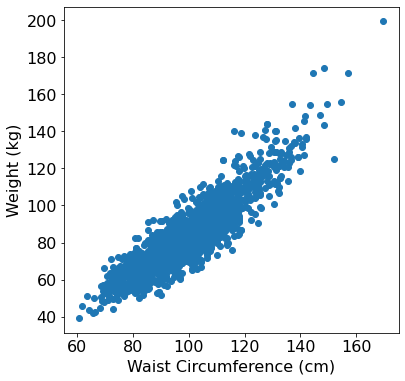

In [8]:
#  TODO: use a scatter plot to plot the attributes that are highly correlated 
font_size = 16               # you can use the size that would be readable easily
plt.rcParams.update({'font.size': font_size})
fig, ax = plt.subplots(figsize=(6,6))
x = df.BMXWAIST
y = df.BMXWT

plt.scatter(x, y)
plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")
plt.show()

Use these two feature in the following exercises 

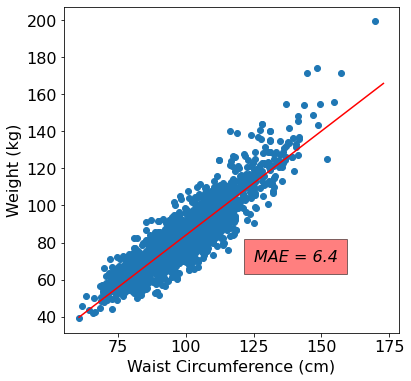

In [9]:
# TODO: fit a linear regression model on the data 
feat1 = 'BMXWAIST'
feat2 = 'BMXWT'

x = np.array(df[feat1]).reshape(-1,1)
y = np.array(df[feat2]).reshape(-1,1)
mdl = LinearRegression()
mdl.fit(x, y)

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x,y, "o");
te = np.arange(min(x),max(x)+4).reshape(-1,1)
te_hat = mdl.predict(te)
plt.plot(te, te_hat, 'r')

plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = mdl.predict(x)
MAE = round(np.mean(np.abs(y - y_hat)),2)

ax.text(125, 70, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('linear.pdf', bbox_inches = 'tight')

In [10]:
# TODO: display the intercept and the coefficient of the linear model
round(mdl.intercept_[0], 2), round(mdl.coef_[0][0], 2)

(-28.7, 1.13)

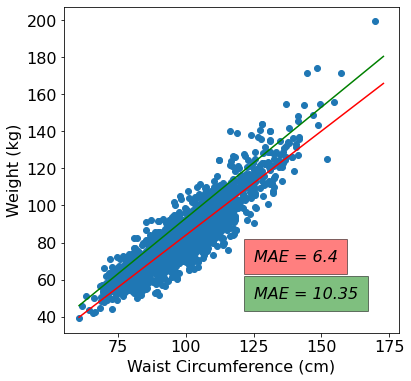

In [11]:
# TODO: modify the intercept and the coefficient slightly and plot the new model with the old one

# We modify the intercept from -28.7 to -27 
# and the coefficient from 1.3 to 1.2
mdl.intercept_[0] = -27
mdl.coef_[0][0] = 1.2

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x,y, "o");
te = np.arange(min(x),max(x)+4).reshape(-1,1)
te_hat2 = mdl.predict(te)
plt.plot(te, te_hat, 'r')      # use the first model for prediction 
plt.plot(te, te_hat2, 'g')      # use the modified model for prediction 



plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")
y_hat2 = mdl.predict(x)
MAE2 = round(np.mean(np.abs(y - y_hat2)),2)

ax.text(125, 70, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(125, 50, "MAE = " + str(MAE2), style='italic',
       bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
# plt.savefig('linear.pdf', bbox_inches = 'tight')
plt.show()



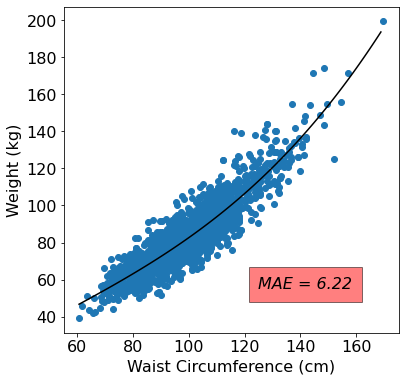

In [12]:
''' TODO: fit a polynomail regression model with degree 3 on the data 
Use the numpy model: np.poly1d(np.polyfit(x, y, 3))
'''
fig, ax = plt.subplots(figsize=(6,6))

x1 = np.array(df["BMXWAIST"])
y1 = np.array(df["BMXWT"])
te = np.arange(min(x1),max(x1))
ploy_mdl_3 = np.poly1d(np.polyfit(x1, y1, 3))


plt.plot(x1, y1, "o");
plt.plot(te, ploy_mdl_3(te), 'k')
plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = ploy_mdl_3(x1)
MAE = round(np.mean(np.abs(y1 - y_hat)),2)

ax.text(125, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('poly1.pdf', bbox_inches = 'tight') 


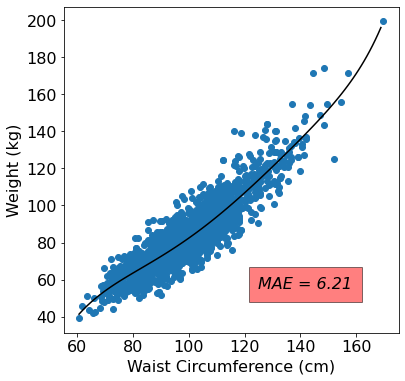

In [13]:
# TODO: fit a polynomail regression model with degree 7 on the data 
fig, ax = plt.subplots(figsize=(6,6))

x1 = np.array(df["BMXWAIST"])
y1 = np.array(df["BMXWT"])
te = np.arange(min(x1),max(x1))
ploy_mdl_7 = np.poly1d(np.polyfit(x1, y1, 7))


plt.plot(x1, y1, "o");
plt.plot(te, ploy_mdl_7(te), 'k')
plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = ploy_mdl_7(x1)
MAE = round(np.mean(np.abs(y1 - y_hat)),2)


ax.text(125, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('poly1.pdf', bbox_inches = 'tight') 


We do the same exercise on a sample of the data

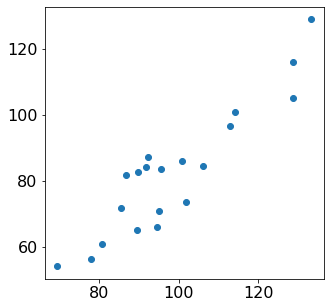

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

sample = df.sample(n = 20)
x_sam = sample["BMXWAIST"]
y_sam = sample["BMXWT"]
ax.scatter(x_sam, y_sam)
plt.show()

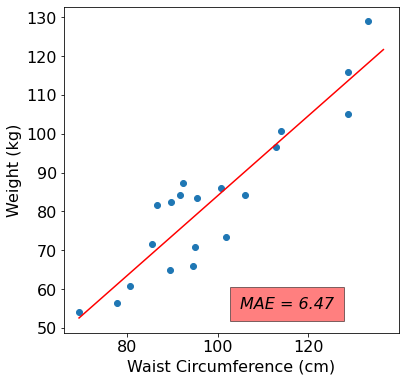

In [15]:
# TODO: fit the three models using the sample this time
x_sam = np.array(sample["BMXWAIST"]).reshape(-1, 1)
y_sam = np.array(sample["BMXWT"]).reshape(-1, 1)

mdl_sam = LinearRegression()
mdl_sam.fit(x_sam, y_sam)

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(x_sam, y_sam, "o");
te = np.arange(min(x_sam),max(x_sam)+4).reshape(-1,1)
te_hat = mdl_sam.predict(te)
plt.plot(te, te_hat, 'r')

plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = mdl_sam.predict(x_sam)
# compute the error on the training values
MAE = round(np.mean(np.abs(y_sam - y_hat)),2)     

ax.text(105, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('linear.pdf', bbox_inches = 'tight')


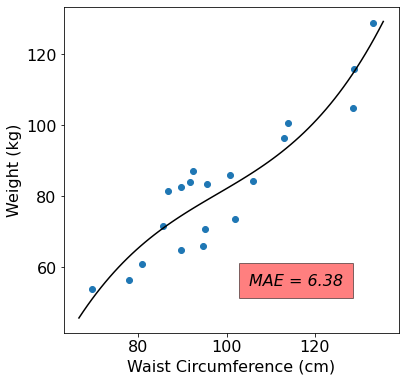

In [16]:
# TODO: fit a polynomail regression model with degree 3 on the sample data 
fig, ax = plt.subplots(figsize=(6,6))

x_sam1 = np.array(sample["BMXWAIST"])
y_sam1 = np.array(sample["BMXWT"])

te = np.arange(min(x_sam1)-3, max(x_sam1)+3)
ploy_mdl_sam_3 = np.poly1d(np.polyfit(x_sam1, y_sam1, 3))


plt.plot(x_sam1, y_sam1, "o");
plt.plot(te, ploy_mdl_sam_3(te), 'k')
plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = ploy_mdl_sam_3(x_sam1)
MAE = round(np.mean(np.abs(y_sam1 - y_hat)),2)

ax.text(105, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('poly1.pdf', bbox_inches = 'tight') 


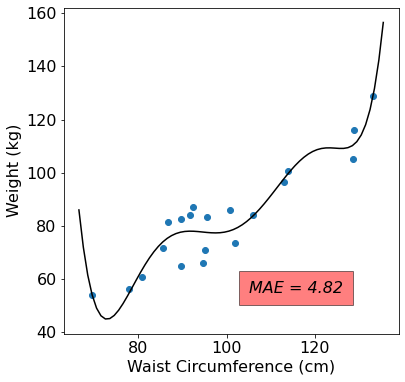

In [17]:
# TODO: fit a polynomail regression model with degree 7 on the sample data 
fig, ax = plt.subplots(figsize=(6,6))

x_sam1 = np.array(sample["BMXWAIST"])
y_sam1 = np.array(sample["BMXWT"])

te = np.arange(min(x_sam1)-3, max(x_sam1)+3)
ploy_mdl_sam_7 = np.poly1d(np.polyfit(x_sam1, y_sam1, 7))


plt.plot(x_sam1, y_sam1, "o");
plt.plot(te, ploy_mdl_sam_7(te), 'k')
plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = ploy_mdl_sam_7(x_sam1)
MAE = round(np.mean(np.abs(y_sam1 - y_hat)),2)

ax.text(105, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})
# plt.title("MAE = " + str(MAE))
plt.savefig('poly1.pdf', bbox_inches = 'tight') 

In [21]:
# TODO: Let's split the sample data into two subsets train, test
# Documentation can be found at 
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_sam, y_sam, test_size=0.25)

len(X_train), len(X_test), len(y_train), len(y_test)

(15, 5, 15, 5)

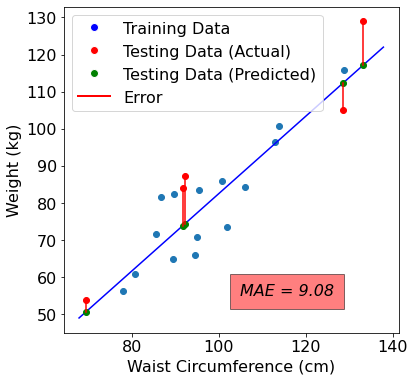

In [37]:
from matplotlib.lines import Line2D

# TODO: fit the three models on the train set and use them to predict the values in the test set
# Compute the Mean Absolute Error on the test set
mdl_t = LinearRegression()
mdl_t.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6,6))
plt.plot(X_train, y_train, "o");
te = np.arange(min(X_train) - 10, max(X_train)+10).reshape(-1,1)
te_hat = mdl_t.predict(te)
plt.plot(te, te_hat, 'b')

plt.xlabel("Waist Circumference (cm)")
plt.ylabel("Weight (kg)")

y_hat = mdl_t.predict(X_test)
plt.plot(X_test, y_hat, 'og')
plt.plot(X_test, y_test, 'or')

# Plot a red vertical line between the actual test point and the predicted value
for i in range(len(X_test)):
    p = X_test[i]
    p_st_end = np.array([y_test[i], y_hat[i]])
    plt.plot(np.array([p, p]), p_st_end, '-r')

# compute the error on the training values
MAE = round(np.mean(np.abs(y_test - y_hat)),2)     

ax.text(105, 55, "MAE = " + str(MAE), style='italic',
       bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

legend_elements = [Line2D([0], [0], marker='o', color='w', label='Training Data', 
                         markerfacecolor='b', markersize = 8),
                   Line2D([0], [0], marker='o', color='w', label='Testing Data (Actual)',
                          markerfacecolor='r', markersize = 8),
                   Line2D([0], [0], marker='o', color='w', label='Testing Data (Predicted)',
                          markerfacecolor='g', markersize = 8),
                   Line2D([0], [0], lw = 2, color='r', label='Error')]
ax.legend(handles=legend_elements)
# plt.title("MAE = " + str(MAE))
plt.savefig('linear.pdf', bbox_inches = 'tight')

# The red vertical lines represent the difference between the actual values and the predicted values

# Demand Forecasting

1- we read a time series from csv file, we use the oil price from https://www.kaggle.com/c/store-sales-time-series-forecasting/data

In [ ]:
df_oil = pd.read_csv('../Data/oil.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''], low_memory=False)

2- We take a look at the data by plotting the whole data

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Oil Price')]

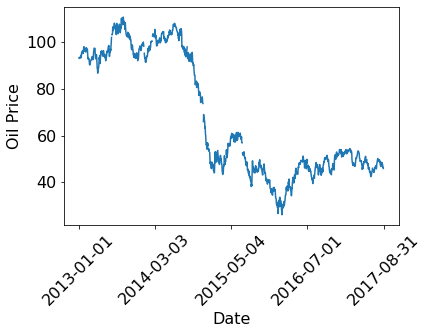

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
start = 0
limit = len(df_oil)
end = start + limit - 1
ax.plot(df_oil.date[start:end], df_oil.dcoilwtico[start:end], '-')

x = [df_oil.date.iloc[start], df_oil.date.iloc[start + math.floor(limit / 4)], \
     df_oil.date.iloc[start + math.floor(limit / 2)], df_oil.date.iloc[start + math.floor(3 * limit / 4)], \
     df_oil.date.iloc[end]]

ax.set_xticks(x)
plt.xticks(rotation = 45)
ax.set(xlabel='Date', ylabel='Oil Price')


3- We cannot see a lot of details, let's consider a smaller period

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Oil Price')]

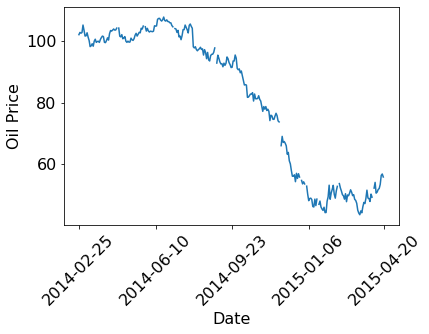

In [ ]:
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots()
start = 300
limit = 300
end = start + limit - 1
ax.plot(df_oil.date[start:end], df_oil.dcoilwtico[start:end], '-')


x = [df_oil.date.iloc[start], df_oil.date.iloc[start + math.floor(limit / 4)], \
     df_oil.date.iloc[start + math.floor(limit / 2)], df_oil.date.iloc[start + math.floor(3 * limit / 4)], \
     df_oil.date.iloc[end]]

ax.set_xticks(x)
plt.xticks(rotation = 45)
ax.set(xlabel='Date', ylabel='Oil Price')


4- We fill the missing values and use moving average to smooth the data

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Oil Price')]

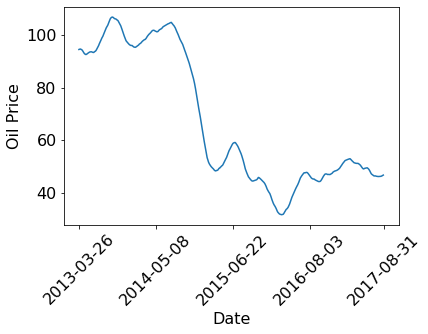

In [ ]:
# This time, fill the missing values with the closest existing value.
df_oil_new = df_oil.copy()

while df_oil_new["dcoilwtico"].isnull().any():
    df_oil_new = df_oil_new.fillna(method='pad', limit=1)
    df_oil_new = df_oil_new.fillna(method='bfill', limit=1)

ma_win_size = 50
df_oil_new['dcoilwtico'] = df_oil_new['dcoilwtico'].rolling(window = ma_win_size).mean()

start = ma_win_size + 10
limit = len(df_oil_new) - ma_win_size
end = start + limit - 11

fig, ax = plt.subplots()

ax.plot(df_oil_new.date[start:end], df_oil_new.dcoilwtico[start:end], '-')
x = [df_oil_new.date.iloc[start], df_oil_new.date.iloc[start + math.floor(limit / 4)], \
     df_oil_new.date.iloc[start + math.floor(limit / 2)], df_oil_new.date.iloc[start + math.floor(3 * limit / 4)], \
     df_oil_new.date.iloc[end]]
ax.set_xticks(x)
plt.xticks(rotation = 45)
ax.set(xlabel='Date', ylabel='Oil Price')


In [ ]:
# Let's read the data again
df_oil_FC = pd.read_csv('../Data/oil.csv', header = 0,
                 quotechar='"',sep=",",
                 na_values = ['na', '-', '.', ''], low_memory=False)

Since, in demand forecasting, we deal with time series, we remove the last two weeks of the data and store it as test data

In [ ]:

while df_oil_FC["dcoilwtico"].isnull().any():
    df_oil_FC = df_oil_FC.fillna(method='pad', limit=1)
    df_oil_FC = df_oil_FC.fillna(method='bfill', limit=1)
idx = df_oil_FC.index[df_oil_FC.date == '2017-08-16'].tolist()
train = df_oil_FC.iloc[0:idx[0]]
test = df_oil_FC.iloc[idx[0]:len(df_oil_FC)]
test

,date,dcoilwtico
1206,2017-08-16,46.80
1207,2017-08-17,47.07
1208,2017-08-18,48.59
1209,2017-08-21,47.39
1210,2017-08-22,47.65
1211,2017-08-23,48.45
1212,2017-08-24,47.24
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46


### Perform demand forecasting using moving average

In [ ]:
k = 5
start = len(train) - k
end = len(train)
new_list = train.dcoilwtico.iloc[start:end].tolist()
# last = new_list.index

for item in test.date:
    windowMA = round(np.mean(new_list[-k:]), 2)
    new_list.append(windowMA)
new_list[-12:]

[48.42,
 48.19,
 48.12,
 47.98,
 48.06,
 48.15,
 48.1,
 48.08,
 48.07,
 48.09,
 48.1,
 48.09]

In [ ]:
# Show the actual price for the test data
test.dcoilwtico

1206    46.80
1207    47.07
1208    48.59
1209    47.39
1210    47.65
1211    48.45
1212    47.24
1213    47.65
1214    46.40
1215    46.46
1216    45.96
1217    47.26
Name: dcoilwtico, dtype: float64

In [ ]:
# Compute the means squared error
t = len(test)
MSE = np.mean((new_list[-t:] - test.dcoilwtico)**2)
MSE

1.3620583333333365

### Perform demand forecasting using Linear Regression

In [ ]:
# We train the model using the last 11 samples from the time series

train = train[-11:]
train.reset_index(drop=True, inplace=True)
offset = math.floor(len(train) / 2)
train['x'] = train.index - offset

xc = np.array(train.x)
yc = np.array(train.dcoilwtico)

myLR = LinearRegression()
myLR.fit(xc.reshape(len(xc),1), yc.reshape(len(yc),1))
# Print the intercept and the coifficient of the model
a0 = myLR.intercept_[0]
a1 = myLR.coef_[0][0]
new_list = list()
xi = np.max(train.x) + 1
for item in test.date:
    yi = a0 + a1 * xi 
    new_list.append(yi)
    xi += 1
new_list

[47.886,
 47.71654545454546,
 47.54709090909091,
 47.37763636363637,
 47.20818181818182,
 47.03872727272728,
 46.86927272727273,
 46.69981818181819,
 46.530363636363646,
 46.3609090909091,
 46.191454545454555,
 46.022000000000006]

### Evaluation

In [ ]:
# Mean absolute error
MAE = np.mean(abs(new_list - test.dcoilwtico)) # computing the mean squared error
MAE

0.6383939393939393

In [ ]:
# Mean squared error
MSE = np.mean((new_list - test.dcoilwtico)**2) # computing the mean squared error
MSE

0.6271196969696954

In [ ]:
# Sum of squared error
SSE = np.sum((new_list - test.dcoilwtico)**2) # computing the sum squared error
SSE

7.525436363636345

In [ ]:
# R-Square
from sklearn.metrics import r2_score
r2 = r2_score(test.dcoilwtico, new_list)
r2

-0.10336091816341897